In [88]:
!ls

0903_output_v5_matched.h5	 RamboTest.ipynb
GenLevelDataset.ipynb		 SpanetOutputAnalysis.ipynb
GenLevelPlots.ipynb		 __pycache__
IncomingPartonsFlow.ipynb	 all_jets_v6.parquet
JetGraphProducer.py		 jet_tagging_combinatorial
JetTagging_initial_debug.ipynb	 loss_plot.png
PyTorchGraphDatasetLoader.ipynb  plot_loss.py
README.md			 tth_matched_2.h5
README.md~


In [211]:
import h5py
import awkward as ak
import vector
import numpy as np
import matplotlib.pyplot as plt
vector.register_awkward()

In [89]:
df = h5py.File('0903_output_v5_matched.h5','r')
df_input = h5py.File('tth_matched_2.h5','r')

In [84]:
df.keys()

<KeysViewHDF5 ['INPUTS', 'TARGETS']>

In [38]:
df["INPUTS"]["Source"]["eta"][()].shape


(67876, 7)

In [103]:
df_input.keys()

<KeysViewHDF5 ['INPUTS', 'TARGETS']>

In [223]:
fields = ['pt','eta','phi','btag']
jets = ak.zip({
    f: df["INPUTS"]["Source"][f][()] for f in fields
}, with_name="Momentum4D")
jets["m"] = np.zeros_like(jets.pt)

In [227]:
jets = ak.drop_none(ak.mask(jets, jets.pt > 0))

In [228]:
H_b1_true = ak.Array(df_input["TARGETS"]["h"]["b1"][()])
H_b2_true = ak.Array(df_input["TARGETS"]["h"]["b2"][()])

# Trick to make it a var-formatted array with 1 element per row
H_b1_true = ak.unflatten(H_b1_true, ak.ones_like(H_b1_true))
H_b2_true = ak.unflatten(H_b2_true, ak.ones_like(H_b2_true))

higgs_index_true = ak.concatenate((H_b1_true, H_b2_true), axis=1)
higgs_jet_true = jets[higgs_index_true]

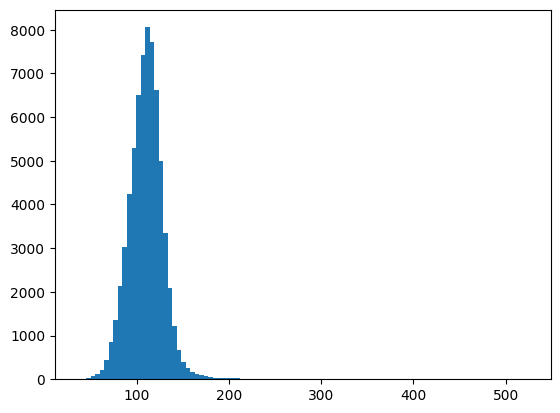

In [232]:
plt.hist((higgs_jet_true[:,0] + higgs_jet_true[:,1]).m, bins=100);